In [1]:
#decision tree

In [2]:
#### data Gathering

In [3]:
import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score


In [4]:
df = pd.read_csv('weather.csv')
df

,outlook,temperature,humidity,windy,play
0,overcast,hot,high,False,yes
1,overcast,cool,normal,True,yes
2,overcast,mild,high,True,yes
3,overcast,hot,normal,False,yes
4,rainy,mild,high,False,yes
5,rainy,cool,normal,False,yes
6,rainy,cool,normal,True,no
7,rainy,mild,normal,False,yes
8,rainy,mild,high,True,no
9,sunny,hot,high,False,no


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   outlook      14 non-null     object
 1   temperature  14 non-null     object
 2   humidity     14 non-null     object
 3   windy        14 non-null     bool  
 4   play         14 non-null     object
dtypes: bool(1), object(4)
memory usage: 590.0+ bytes


In [6]:
df.isna().sum()

outlook        0
temperature    0
humidity       0
windy          0
play           0
dtype: int64

In [7]:
df['outlook'].value_counts()

rainy       5
sunny       5
overcast    4
Name: outlook, dtype: int64

In [8]:
df['outlook'].value_counts().to_dict()

{'rainy': 5, 'sunny': 5, 'overcast': 4}

In [9]:
df['outlook'].replace({'rainy':0 , 'sunny':2 , 'overcast': 1},inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   outlook      14 non-null     int64 
 1   temperature  14 non-null     object
 2   humidity     14 non-null     object
 3   windy        14 non-null     bool  
 4   play         14 non-null     object
dtypes: bool(1), int64(1), object(3)
memory usage: 590.0+ bytes


In [11]:
print(df['temperature'].value_counts().to_dict())
print(df['humidity'].value_counts().to_dict())
print(df['windy'].value_counts().to_dict())
print(df['play'].value_counts().to_dict())

{'mild': 6, 'hot': 4, 'cool': 4}
{'high': 7, 'normal': 7}
{False: 8, True: 6}
{'yes': 9, 'no': 5}


In [12]:
df['temperature'].replace({'mild': 2, 'hot': 1, 'cool': 0},inplace=True)
df['humidity'].replace({'high': 0, 'normal': 1},inplace=True)
df['windy'].replace({False: 0, True: 1},inplace=True)
df['play'].replace({'yes': 1, 'no': 0},inplace=True)


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   outlook      14 non-null     int64
 1   temperature  14 non-null     int64
 2   humidity     14 non-null     int64
 3   windy        14 non-null     int64
 4   play         14 non-null     int64
dtypes: int64(5)
memory usage: 688.0 bytes


In [14]:
x = df.drop('play',axis=1)
y = df['play']

In [15]:
x

,outlook,temperature,humidity,windy
0,1,1,0,0
1,1,0,1,1
2,1,2,0,1
3,1,1,1,0
4,0,2,0,0
5,0,0,1,0
6,0,0,1,1
7,0,2,1,0
8,0,2,0,1
9,2,1,0,0


In [16]:
y

0     1
1     1
2     1
3     1
4     1
5     1
6     0
7     1
8     0
9     0
10    0
11    0
12    1
13    1
Name: play, dtype: int64

In [17]:
model = DecisionTreeClassifier()
model.fit(x,y)

DecisionTreeClassifier()

In [18]:
y_pred = model.predict(x)
y_pred

acc = accuracy_score(y,y_pred)
print("Accuracy==",acc)

cnf = confusion_matrix(y,y_pred)
print("Confusion Matrix ==\n",cnf)

cls_r = classification_report(y,y_pred)
print("Classification Report==\n",cls_r)


Accuracy== 1.0
Confusion Matrix ==
 [[5 0]
 [0 9]]
Classification Report==
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         9

    accuracy                           1.00        14
   macro avg       1.00      1.00      1.00        14
weighted avg       1.00      1.00      1.00        14



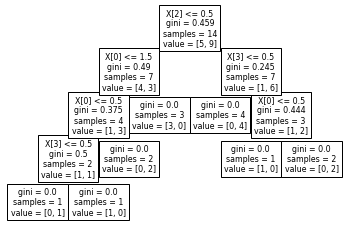

In [19]:
tree = plot_tree(model)

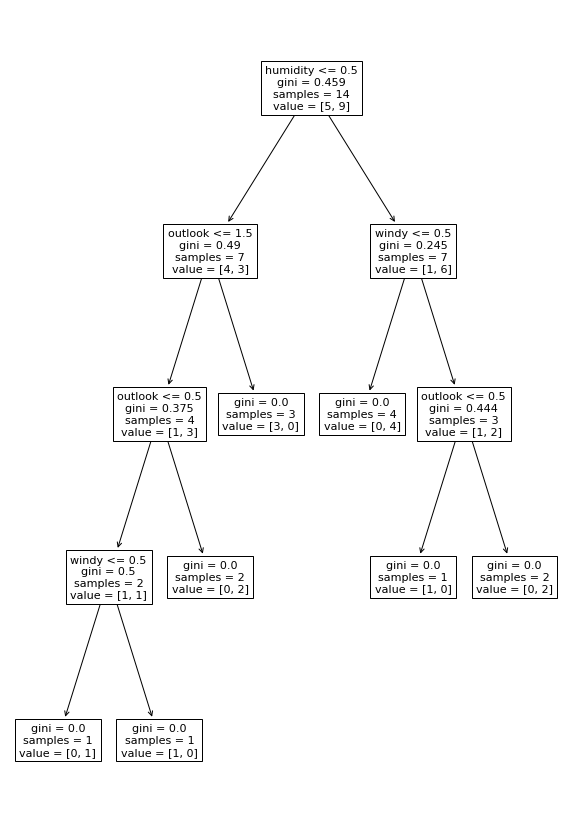

In [20]:
plt.figure(figsize=(10,15))
tree = plot_tree(model,feature_names=x.columns)

In [21]:
# user Test 
data = df.loc[1]
data

outlook        1
temperature    0
humidity       1
windy          1
play           1
Name: 1, dtype: int64

In [22]:
arr =np.array([0, 0, 1, 1])
arr

array([0, 0, 1, 1])

In [23]:
res = model.predict([arr])
res

C:\Users\RJ\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [24]:
import pickle
with open("dt_model.pkl",'wb') as file:
    pickle.dump(model,file)